In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
dataset = pd.read_csv('iris.csv')
dataset["Species"][50]

'Iris-versicolor'

In [38]:
features = ["SepalLengthCm", "SepalWidthCm", "Species"]

test = dataset[features][:3]
test = pd.concat([test, dataset[features][50:53]])
test = pd.concat([test, dataset[features][100:103]])

train = dataset[features][3:50]
train = pd.concat([train, dataset[features][53:100]])
train = pd.concat([train, dataset[features][103:150]])

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

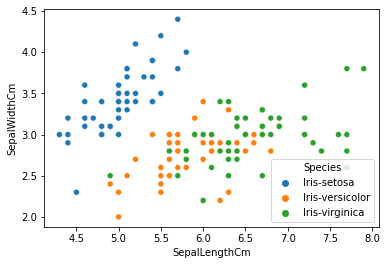

In [39]:
sns.scatterplot(data=train,x="SepalLengthCm",y="SepalWidthCm",hue="Species")

In [40]:
correct = 0
wrong = 0

data = {
    "SepalLengthCm" : [],
    "SepalWidthCm" : [],
    "ActualClass" : [],
    "PredictedClass" : []
}

df = pd.DataFrame(data)

for row in range(0, test.shape[0]):
    dist = []
    setosa = 0
    versi_color = 0
    virginica = 0
    
    selected_row = test.iloc[row]
    x1 = selected_row["SepalLengthCm"]
    y1 = selected_row["SepalWidthCm"]  
    
    for row2 in range(0, train.shape[0]):
        selected_row1 = train.iloc[row2]
        x2 = selected_row1["SepalLengthCm"]
        y2 = selected_row1["SepalWidthCm"]
        p1 = np.array((x1, y1))
        p2 = np.array((x2, y2))
        
        euclidian_dist = np.linalg.norm(p1-p2)
        dist.append([row2, euclidian_dist])
    
    dist1 = sorted(dist, key = lambda x : x[1])
    
#     print(dist1)
#     print(dist1[2][0])
    
    for i in range(0,7):
        if(dist1[i][0] <= 47):
            setosa += 1
        elif(dist1[i][0] > 47 and dist1[i][0] <= 94):
            versi_color += 1
        else:
            virginica += 1
    
    print(setosa, versi_color, virginica)
            
    cls = max(setosa, versi_color, virginica)
#     print(cls)
    
    if(cls == setosa):
        if selected_row["Species"] == "Iris-setosa":
            correct += 1
            newdata = {"SepalLengthCm" : selected_row["SepalLengthCm"], "SepalWidthCm" : selected_row["SepalWidthCm"],
                      "ActualClass" : selected_row["Species"], "PredictedClass" : "Iris-setosa"}
            df = df.append(newdata, ignore_index = True)
        else:
            if cls == versi_color:
                newdata = {"SepalLengthCm" : selected_row["SepalLengthCm"], "SepalWidthCm" : selected_row["SepalWidthCm"],
                      "ActualClass" : selected_row["Species"], "PredictedClass" : "Iris-versicolor"}
                df = df.append(newdata, ignore_index = True)
            elif cls == virginica:
                newdata = {"SepalLengthCm" : selected_row["SepalLengthCm"], "SepalWidthCm" : selected_row["SepalWidthCm"],
                      "ActualClass" : selected_row["Species"], "PredictedClass" : "Iris-virginica"}
                df = df.append(newdata, ignore_index = True)
            else:
                newdata = {"SepalLengthCm" : selected_row["SepalLengthCm"], "SepalWidthCm" : selected_row["SepalWidthCm"],
                      "ActualClass" : selected_row["Species"], "PredictedClass" : "Iris-setosa"}
                df = df.append(newdata, ignore_index = True)
            wrong += 1
    elif(cls == versi_color):
        if selected_row["Species"] == "Iris-versicolor":
            correct += 1
            newdata = {"SepalLengthCm" : selected_row["SepalLengthCm"], "SepalWidthCm" : selected_row["SepalWidthCm"],
                      "ActualClass" : selected_row["Species"], "PredictedClass" : "Iris-versicolor"}
            df = df.append(newdata, ignore_index = True)
        else:
            if cls == setosa:
                newdata = {"SepalLengthCm" : selected_row["SepalLengthCm"], "SepalWidthCm" : selected_row["SepalWidthCm"],
                      "ActualClass" : selected_row["Species"], "PredictedClass" : "Iris-setosa"}
                df = df.append(newdata, ignore_index = True)
            elif cls == virginica:
                newdata = {"SepalLengthCm" : selected_row["SepalLengthCm"], "SepalWidthCm" : selected_row["SepalWidthCm"],
                      "ActualClass" : selected_row["Species"], "PredictedClass" : "Iris-virginica"}
                df = df.append(newdata, ignore_index = True)
            else:
                newdata = {"SepalLengthCm" : selected_row["SepalLengthCm"], "SepalWidthCm" : selected_row["SepalWidthCm"],
                      "ActualClass" : selected_row["Species"], "PredictedClass" : "Iris-versicolor"}
                df = df.append(newdata, ignore_index = True)
            wrong += 1
    else:
        if selected_row["Species"] == "Iris-virginica":
            correct += 1
            newdata = {"SepalLengthCm" : selected_row["SepalLengthCm"], "SepalWidthCm" : selected_row["SepalWidthCm"],
                      "ActualClass" : selected_row["Species"], "PredictedClass" : "Iris-virginica"}
            df = df.append(newdata, ignore_index = True)
        else:
            if cls == versi_color:
                newdata = {"SepalLengthCm" : selected_row["SepalLengthCm"], "SepalWidthCm" : selected_row["SepalWidthCm"],
                      "ActualClass" : selected_row["Species"], "PredictedClass" : "Iris-versicolor"}
                df = df.append(newdata, ignore_index = True)
            elif cls == setosa:
                newdata = {"SepalLengthCm" : selected_row["SepalLengthCm"], "SepalWidthCm" : selected_row["SepalWidthCm"],
                      "ActualClass" : selected_row["Species"], "PredictedClass" : "Iris-setosa"}
                df = df.append(newdata, ignore_index = True)
            else:
                newdata = {"SepalLengthCm" : selected_row["SepalLengthCm"], "SepalWidthCm" : selected_row["SepalWidthCm"],
                      "ActualClass" : selected_row["Species"], "PredictedClass" : "Iris-virginica"}
                df = df.append(newdata, ignore_index = True)
            wrong += 1

err = wrong/9 * 100

print("Accuracy : ",100 - err)
df

7 0 0
7 0 0
7 0 0


C:\Users\Pranav\AppData\Local\Temp\ipykernel_7888\3401546847.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(newdata, ignore_index = True)
C:\Users\Pranav\AppData\Local\Temp\ipykernel_7888\3401546847.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(newdata, ignore_index = True)
C:\Users\Pranav\AppData\Local\Temp\ipykernel_7888\3401546847.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(newdata, ignore_index = True)
C:\Users\Pranav\AppData\Local\Temp\ipykernel_7888\3401546847.py:109: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(newdata, ignore_index = True)
C:\User

0 0 7
0 1 6
0 2 5
0 2 5
0 5 2
0 0 7
Accuracy :  55.55555555555556


C:\Users\Pranav\AppData\Local\Temp\ipykernel_7888\3401546847.py:109: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(newdata, ignore_index = True)
C:\Users\Pranav\AppData\Local\Temp\ipykernel_7888\3401546847.py:96: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(newdata, ignore_index = True)
C:\Users\Pranav\AppData\Local\Temp\ipykernel_7888\3401546847.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(newdata, ignore_index = True)
C:\Users\Pranav\AppData\Local\Temp\ipykernel_7888\3401546847.py:96: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(newdata, ignore_index = True)


,SepalLengthCm,SepalWidthCm,ActualClass,PredictedClass
0,5.1,3.5,Iris-setosa,Iris-setosa
1,4.9,3.0,Iris-setosa,Iris-setosa
2,4.7,3.2,Iris-setosa,Iris-setosa
3,7.0,3.2,Iris-versicolor,Iris-virginica
4,6.4,3.2,Iris-versicolor,Iris-virginica
5,6.9,3.1,Iris-versicolor,Iris-virginica
6,6.3,3.3,Iris-virginica,Iris-virginica
7,5.8,2.7,Iris-virginica,Iris-versicolor
8,7.1,3.0,Iris-virginica,Iris-virginica


In [41]:
features_1 = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "Species"]

test = dataset[features_1][0:3]
test = pd.concat([test, dataset[features_1][50:53]])
test = pd.concat([test, dataset[features_1][100:103]])

train = dataset[features_1][3:50]
train = pd.concat([train, dataset[features_1][53:100]])
train = pd.concat([train, dataset[features_1][103:150]])

In [42]:
correct = 0
wrong = 0

data1 = {
    "SepalLengthCm" : [],
    "SepalWidthCm" : [],
    "ActualClass" : [],
    "PredictedClass" : []
}

df1 = pd.DataFrame(data1)

for row in range(0, test.shape[0]):
    dist = []
    setosa = 0
    versi_color = 0
    virginica = 0
    
    selected_row = test.iloc[row]
    x1 = selected_row["SepalLengthCm"]
    y1 = selected_row["SepalWidthCm"]  
    z1 = selected_row["PetalLengthCm"]
    q1 = selected_row["PetalWidthCm"]
    
    for row2 in range(0, train.shape[0]):
        selected_row1 = train.iloc[row2]
        x2 = selected_row1["SepalLengthCm"]
        y2 = selected_row1["SepalWidthCm"]
        z2 = selected_row1["PetalLengthCm"]
        q2 = selected_row1["PetalWidthCm"]
        p1 = np.array((x1, y1, z1, q1))
#         print(p1)
        p2 = np.array((x2, y2, z2, q2))
        
        euclidian_dist = np.linalg.norm(p1-p2)
        dist.append([row2, euclidian_dist])
    
    dist1 = sorted(dist, key = lambda x : x[1])
    
#     print(dist1)
    
    for i in range(0,5):
        if(dist1[i][0] <= 47):
            setosa += 1
        elif(dist1[i][0] > 47 and dist1[i][0] <= 94):
            versi_color += 1
        else:
            virginica += 1
    
#     print(setosa, versi_color, virginica)
            
    cls = max(setosa, versi_color, virginica)
    
    if(cls == setosa):
        if selected_row["Species"] == "Iris-setosa":
            correct += 1
            newdata = {"SepalLengthCm" : selected_row["SepalLengthCm"], "SepalWidthCm" : selected_row["SepalWidthCm"],
                      "ActualClass" : selected_row["Species"], "PredictedClass" : "Iris-setosa"}
            df1 = df1.append(newdata, ignore_index = True)
        else:
            if cls == versi_color:
                newdata = {"SepalLengthCm" : selected_row["SepalLengthCm"], "SepalWidthCm" : selected_row["SepalWidthCm"],
                      "ActualClass" : selected_row["Species"], "PredictedClass" : "Iris-versicolor"}
                df1 = df1.append(newdata, ignore_index = True)
            elif cls == virginica:
                newdata = {"SepalLengthCm" : selected_row["SepalLengthCm"], "SepalWidthCm" : selected_row["SepalWidthCm"],
                      "ActualClass" : selected_row["Species"], "PredictedClass" : "Iris-virginica"}
                df1 = df1.append(newdata, ignore_index = True)
            else:
                newdata = {"SepalLengthCm" : selected_row["SepalLengthCm"], "SepalWidthCm" : selected_row["SepalWidthCm"],
                      "ActualClass" : selected_row["Species"], "PredictedClass" : "Iris-setosa"}
                df1 = df1.append(newdata, ignore_index = True)
            wrong += 1
    elif(cls == versi_color):
        if selected_row["Species"] == "Iris-versicolor":
            correct += 1
            newdata = {"SepalLengthCm" : selected_row["SepalLengthCm"], "SepalWidthCm" : selected_row["SepalWidthCm"],
                      "ActualClass" : selected_row["Species"], "PredictedClass" : "Iris-versicolor"}
            df1 = df1.append(newdata, ignore_index = True)
        else:
            if cls == setosa:
                newdata = {"SepalLengthCm" : selected_row["SepalLengthCm"], "SepalWidthCm" : selected_row["SepalWidthCm"],
                      "ActualClass" : selected_row["Species"], "PredictedClass" : "Iris-setosa"}
                df1 = df1.append(newdata, ignore_index = True)
            elif cls == virginica:
                newdata = {"SepalLengthCm" : selected_row["SepalLengthCm"], "SepalWidthCm" : selected_row["SepalWidthCm"],
                      "ActualClass" : selected_row["Species"], "PredictedClass" : "Iris-virginica"}
                df1 = df1.append(newdata, ignore_index = True)
            else:
                newdata = {"SepalLengthCm" : selected_row["SepalLengthCm"], "SepalWidthCm" : selected_row["SepalWidthCm"],
                      "ActualClass" : selected_row["Species"], "PredictedClass" : "Iris-versicolor"}
                df1 = df1.append(newdata, ignore_index = True)
            wrong += 1
    else:
        if selected_row["Species"] == "Iris-virginica":
            correct += 1
            newdata = {"SepalLengthCm" : selected_row["SepalLengthCm"], "SepalWidthCm" : selected_row["SepalWidthCm"],
                      "ActualClass" : selected_row["Species"], "PredictedClass" : "Iris-virginica"}
            df1 = df1.append(newdata, ignore_index = True)
        else:
            if cls == versi_color:
                newdata = {"SepalLengthCm" : selected_row["SepalLengthCm"], "SepalWidthCm" : selected_row["SepalWidthCm"],
                      "ActualClass" : selected_row["Species"], "PredictedClass" : "Iris-versicolor"}
                df1 = df1.append(newdata, ignore_index = True)
            elif cls == setosa:
                newdata = {"SepalLengthCm" : selected_row["SepalLengthCm"], "SepalWidthCm" : selected_row["SepalWidthCm"],
                      "ActualClass" : selected_row["Species"], "PredictedClass" : "Iris-setosa"}
                df1 = df1.append(newdata, ignore_index = True)
            else:
                newdata = {"SepalLengthCm" : selected_row["SepalLengthCm"], "SepalWidthCm" : selected_row["SepalWidthCm"],
                      "ActualClass" : selected_row["Species"], "PredictedClass" : "Iris-virginica"}
                df1 = df1.append(newdata, ignore_index = True)
            wrong += 1


err = wrong/9 * 100

print("Accuracy : ",100 - err)
df1

C:\Users\Pranav\AppData\Local\Temp\ipykernel_7888\2332408570.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(newdata, ignore_index = True)
C:\Users\Pranav\AppData\Local\Temp\ipykernel_7888\2332408570.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(newdata, ignore_index = True)
C:\Users\Pranav\AppData\Local\Temp\ipykernel_7888\2332408570.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(newdata, ignore_index = True)
C:\Users\Pranav\AppData\Local\Temp\ipykernel_7888\2332408570.py:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(newdata, ignore_index = True)


Accuracy :  100.0


C:\Users\Pranav\AppData\Local\Temp\ipykernel_7888\2332408570.py:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(newdata, ignore_index = True)
C:\Users\Pranav\AppData\Local\Temp\ipykernel_7888\2332408570.py:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(newdata, ignore_index = True)
C:\Users\Pranav\AppData\Local\Temp\ipykernel_7888\2332408570.py:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(newdata, ignore_index = True)
C:\Users\Pranav\AppData\Local\Temp\ipykernel_7888\2332408570.py:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(newdata, ignore_index = True)


,SepalLengthCm,SepalWidthCm,ActualClass,PredictedClass
0,5.1,3.5,Iris-setosa,Iris-setosa
1,4.9,3.0,Iris-setosa,Iris-setosa
2,4.7,3.2,Iris-setosa,Iris-setosa
3,7.0,3.2,Iris-versicolor,Iris-versicolor
4,6.4,3.2,Iris-versicolor,Iris-versicolor
5,6.9,3.1,Iris-versicolor,Iris-versicolor
6,6.3,3.3,Iris-virginica,Iris-virginica
7,5.8,2.7,Iris-virginica,Iris-virginica
8,7.1,3.0,Iris-virginica,Iris-virginica


- For splitting the dataset into train and test set as we already know the data i.e., each class has 50 data entries therfore directly using the indices we can split the dataset.
- For the scatter plot from the seaborn library we can use the scatterplot library which takes the input x-axis, y-axis labels and according to the mentioned column name in the parameter 'hue' it distinguishes the classes into different colours.
- Inference from the plot : Iris-setosa has greater sepal width than the others, Iris-virginica has greater sepal length than the others. 
- To implement KNN for each of the data entry in the test data we calculate the euclidian distance for all of the data entires in the train data for each calculated distance took a new list and append the distance and the index which could be further used to identify the class of the data entry. Then we take K minimum distances from the sorted distances list which are sorted based on the distances.
- From the obtained sorted distance list by using the indices we have in that list we get the actual class in the original train set and check which class is in maximum number. If the predicted class matches the actual class of the test data point, the prediction is considered correct. Otherwise, it's counted as a wrong prediction.
- You calculate the accuracy by dividing the number of correct predictions by the total number of predictions. The accuracy is then converted to a percentage.
- For the first part of the question any value of the k greater than or equal to 3 we get the accuracy of 55.56% and the second part of the question where we use all the features and for any value of k we get the accuracy of 100%.